# <b>Theoreticl Questions<b>

**Q1:**
<br>
To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim

**A1:**
<br>
The model performance would be a better evaluation metric in this case. Model accuracy is just the number of correct predictions made by the model devided by the total number of predictions - which would not be a good model in this case because we have a relatively small number of people in the population with the T1D. For example, if we use a classifier that classifies all patients as being healthy, we would get an accuracy of at least 99.67% (according to the assignment that states that up to 0.33% suffer from T1D), which is a very high accuracy, but this is a terrible classifier.

**Q2:**
<br>
T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

**A2:** 

**Classifier1**
<br>
Pros - Easy to visualize data, less weights to train.
<br>
Cons - Selected feature may not be the best features, the less features we have - the more missing information in one of the features might increase errors in the classification.
    
**Classifier2**
<br>
Pros - Contains a wider selection of features which might help get a better classification.
<br>
Cons - Longer training time, may contain redundant features.

**Q3:**
<br>
A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

**A3:**
<br>
Since the data is difficult to distinguish by just looking at the features, logistic regression would not be useful for classification, nor would linear SVM, since the data is non-seperable, and therefore we cannot seperate the data using a linear line.
In this case, nonlinear SVM would be the most useful method, since it would transform our non-seperable data into a higher dimensional space, where the data might prove to be seperable.

**Q4:**
<br>
What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

**A4:** 
The main difference between LR and Linear SVM is that linear SVM find the "best" margin that seperates the classes, while LR does not, and can have different boundaries with different weights (the boundary is not "optimized").
Another differense is that LR uses a probobilistic approach, while SVM is deterministic.
The differnce in the concept of their hyper-parameters tuning is that LR uses a regularization (penalty) - for example, l1 or l2, and the C parameter which gives us the penalty strength. For linear SVM - we use the "kernel trick" in order to find the best hypter-parameters.

# <b>Coding Assignment<b>

In [1]:
# imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#T1D data 
df_raw = pd.read_csv("HW2_data.csv")
df = df_raw.copy()

#preprocessing
#converting family history to Yes/No
df['Family History'] = df['Family History'].map({1: 'Yes', 0 : 'No'})
#since only around 7% of data has missing values, we dropped these rows
df = df.dropna()
print(df.shape)

(523, 18)


The reason we dropped the rows and not entered NA values is so when we convert the data into One hot vector, we won't have extra categories due to the NA values. We also didn't want to add random value to the dataset since the values are binary.

In [3]:
# train test split
# feature columns
features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17]
X = df.iloc[:,features]
# T1D prediction
y = df.iloc[:,16]
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10, stratify=y)

<b>Data visualization and exploration<b>

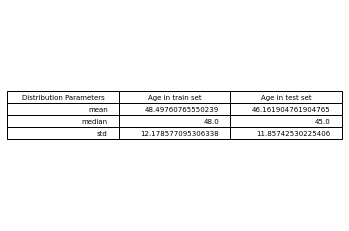

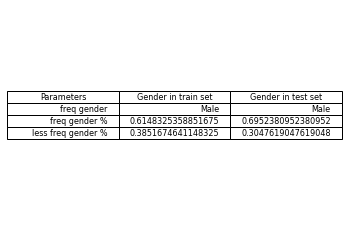

In [4]:
#Distribution in train and test set

fig1, ax1 =plt.subplots(1,1)
st1 = X_train.iloc[:,0].describe()
st2 = x_test.iloc[:,0].describe()
data = [['mean',st1['mean'],st2['mean']],['median',st1['50%'],st2['50%']],['std',st1['std'],st2['std']]]

column_labels=["Distribution Parameters", "Age in train set", "Age in test set"]
ax1.axis('tight')
ax1.axis('off')
ax1.table(cellText=data,colLabels=column_labels,loc="center")
plt.show()

fig2, ax2 =plt.subplots(1,1)
st1 = X_train.iloc[:,1].describe()
st2 = x_test.iloc[:,1].describe()
data = [['freq gender',st1['top'],st2['top']],['freq gender %',st1['freq']/st1['count'],st2['freq']/st2['count']],['less freq gender %',1-st1['freq']/st1['count'],1-st2['freq']/st2['count']]]
column_labels=["Parameters", "Gender in train set", "Gender in test set"]
ax2.axis('tight')
ax2.axis('off')
ax2.table(cellText=data,colLabels=column_labels,loc="center")
plt.show()


    
    


In [5]:
dict_stat_train={}
dict_stat_test={} 
for f in X_train.columns:
    if f == 'Age' or f == 'Gender':
        continue
    count = X_train[f].describe(exclude=[np.number])['count']
    top = X_train[f].describe(exclude=[np.number])['top']
    freq = X_train[f].describe(exclude=[np.number])['freq']
    if top == 'Yes':
        dict_stat_train['%  Yes in ' + str(f)]=freq/count
    else:
        dict_stat_train['%  Yes in ' + str(f)]=1-freq/count
    
    count = x_test[f].describe(exclude=[np.number])['count']
    top = x_test[f].describe(exclude=[np.number])['top']
    freq = x_test[f].describe(exclude=[np.number])['freq']
    if top == 'Yes':
        dict_stat_test['%  Yes in ' + str(f)]=freq/count
    else:
        dict_stat_test['%  Yes in ' + str(f)]=1-freq/count

print('Train set stats')
print(dict_stat_train)
print('Test set stats')
print(dict_stat_test)

    

Train set stats
{'%  Yes in Increased Urination': 0.5047846889952153, '%  Yes in Increased Thirst': 0.46172248803827753, '%  Yes in Sudden Weight Loss': 0.416267942583732, '%  Yes in Weakness': 0.5813397129186603, '%  Yes in Increased Hunger': 0.46650717703349287, '%  Yes in Genital Thrush': 0.20334928229665072, '%  Yes in Visual Blurring': 0.4593301435406698, '%  Yes in Itching': 0.49521531100478466, '%  Yes in Irritability': 0.24641148325358853, '%  Yes in Delayed Healing': 0.47846889952153115, '%  Yes in Partial Paresis': 0.43779904306220097, '%  Yes in Muscle Stiffness': 0.37559808612440193, '%  Yes in Hair Loss': 0.34928229665071775, '%  Yes in Obesity': 0.1722488038277512, '%  Yes in Family History': 0.4976076555023924}
Test set stats
{'%  Yes in Increased Urination': 0.4571428571428572, '%  Yes in Increased Thirst': 0.38095238095238093, '%  Yes in Sudden Weight Loss': 0.4095238095238095, '%  Yes in Weakness': 0.6, '%  Yes in Increased Hunger': 0.4095238095238095, '%  Yes in Geni

If training and test datasets are not sampled from the same distribution, there is an imbalance between them then training  cannot be used to predict anything about the test dataset in a usable manner.
<br>
This problem is known as **DataShift**
<br>
We can treat DataShift by:
<br>
1. Dropping of drifting features
2. Importance weight using Density Ratio Estimation

In [6]:
# relationship between feature and label



In [7]:
for col in df:
    vector = pd.get_dummies(df[[col]].astype(str), drop_first=True) # convertion to string allows us to work with the ages
    df = pd.concat([df,vector],axis=1)
    df = df.drop(columns=[col])
df.head()

,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,...,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Hair Loss_Yes,Obesity_Yes,Diagnosis_Positive,Family History_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
